In [2]:
# Data exploration
from typing import Dict
import pandas as pd

# Train data
train: Dict[str, pd.DataFrame] = {
    'anger': pd.read_csv('https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/assignment_1/data/train/anger-train.txt', sep='\t', names=['id', 'tweet', 'class', 'sentiment_intensity']),
    'fear': pd.read_csv('https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/assignment_1/data/train/fear-train.txt', sep='\t', names=['id', 'tweet', 'class', 'sentiment_intensity']),
    'joy': pd.read_csv('https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/assignment_1/data/train/joy-train.txt', sep='\t', names=['id', 'tweet', 'class', 'sentiment_intensity']),
    'sadness': pd.read_csv('https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/assignment_1/data/train/sadness-train.txt', sep='\t', names=['id', 'tweet', 'class', 'sentiment_intensity'])
}
# Test data
target: Dict[str, pd.DataFrame] = {
    'anger': pd.read_csv('https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/assignment_1/data/target/anger-target.txt', sep='\t', names=['id', 'tweet', 'class', 'sentiment_intensity'], na_values=['NONE']),
    'fear': pd.read_csv('https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/assignment_1/data/target/fear-target.txt', sep='\t', names=['id', 'tweet', 'class', 'sentiment_intensity'], na_values=['NONE']),
    'joy': pd.read_csv('https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/assignment_1/data/target/joy-target.txt', sep='\t', names=['id', 'tweet', 'class', 'sentiment_intensity'], na_values=['NONE']),
    'sadness': pd.read_csv('https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/assignment_1/data/target/sadness-target.txt', sep='\t', names=['id', 'tweet', 'class', 'sentiment_intensity'], na_values=['NONE'])
}

In [21]:
# utils functions
from typing import Optional, Dict

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def get_most_common_words(*, df: pd.DataFrame, intensity: Optional[str] = None) -> Dict[str, int]:
    """ Obtains a dict with most common words founded in given dataset """
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = []
    df = df[df['sentiment_intensity'] == intensity] if intensity is not None else df
    for row in df.iterrows():
        words.extend(word_tokenize(row[1]['tweet']))
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    words_count = {}
    for word in words:
        if word in words_count:
            words_count[word] += 1
        else:
            words_count[word] = 1
    MAX_WORDS: int = 30
    words_count = sorted(words_count.items(), key=lambda x: x[1], reverse=True)[:MAX_WORDS]
    return {word: count for word, count in words_count}

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/keviinplz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/keviinplz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/keviinplz/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Feeling type: anger


,id,tweet,class,sentiment_intensity
334,10334,I'm not used to pretty girls that use curse wo...,anger,medium
583,10583,@judahandthelion TONIGHT. Legit can't wait to ...,anger,medium
408,10408,@JuliaHB1 Bloody right #fume,anger,medium
370,10370,@CBSBigBrother never bring back Meech and Brid...,anger,medium
30,10030,"This fuck you is boiling up inside, its not go...",anger,high


Rows: 941 



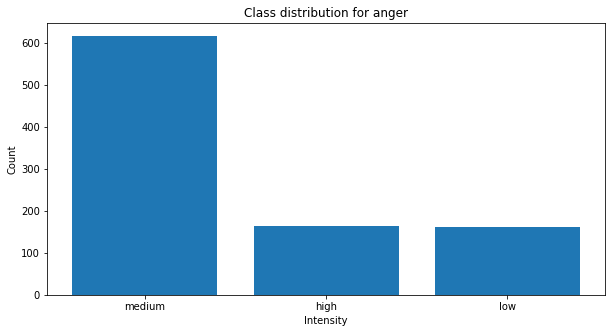

Feeling type: fear


,id,tweet,class,sentiment_intensity
435,20435,@YahooCare data stolen in 2014 and only now do...,fear,medium
101,20101,Andrew's hands start shaking and he says 'I ho...,fear,high
51,20051,#ObamaLegacy - weekly #riots and #terror attac...,fear,high
63,20063,Now this is getting out of hand. I'm freaked o...,fear,high
1072,21072,It's a good day at work when you get to shake ...,fear,low


Rows: 1257 



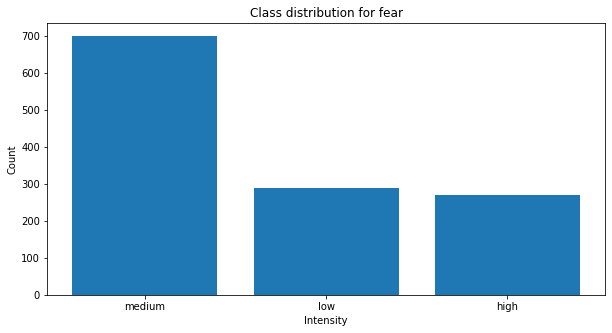

Feeling type: joy


,id,tweet,class,sentiment_intensity
70,30070,2 days until #GoPackGo and 23 days until #GoGi...,joy,high
235,30235,@saraandgreg @Airbnb Another happy customer. ...,joy,medium
430,30430,Watch this amazing live.ly broadcast by @broit...,joy,medium
412,30412,@jessbr0ughton don't be shy next time! We're a...,joy,medium
39,30039,Getting my comedic relief w/ @SofiaVergara dur...,joy,high


Rows: 902 



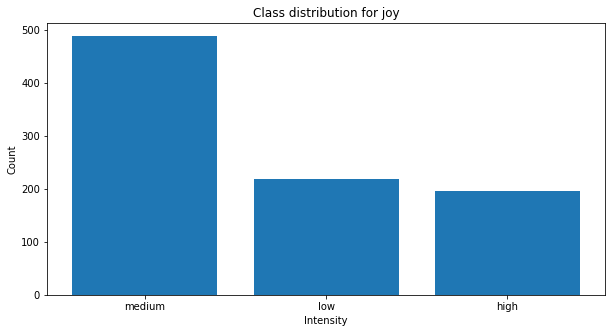

Feeling type: sadness


,id,tweet,class,sentiment_intensity
714,40714,#FF \n\n@The_Family_X \n\n#soul #blues &amp; #...,sadness,low
605,40605,@Bietron 🤓 dont be sad.. btw good night davina...,sadness,low
120,40120,where broken hearted lovers do cry away their ...,sadness,high
208,40208,"@happyandbashful Flirt, simper, pout, repeat. ...",sadness,medium
380,40380,Has anyone noticed that @npr stories in recent...,sadness,medium


Rows: 860 



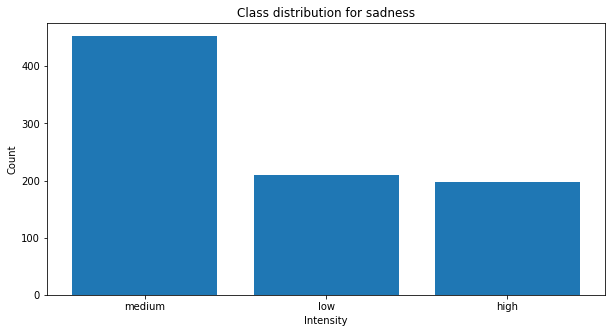

In [5]:
# Show random data for each feeling
from IPython.display import display 
import matplotlib.pyplot as plt

seed: int = 42

feeling: str 
for feeling in train:
    print(f'Feeling type: {feeling}')
    display(train[feeling].sample(5, random_state=seed))
    print(f'Rows: {train[feeling].shape[0]} \n')
    class_count: Dict[str, int] = train[feeling]["sentiment_intensity"].value_counts().to_dict()

    # Plot class distribution
    plt.figure(figsize=(10,5))
    plt.bar(class_count.keys(), class_count.values())
    plt.title(f'Class distribution for {feeling}')
    plt.xlabel('Intensity')
    plt.ylabel('Count')
    plt.show()


Se puede notar que en las cuatro clases hay un desbalance entre los datos de intensidad, siendo la intensidad media la que mayor representación tiene.

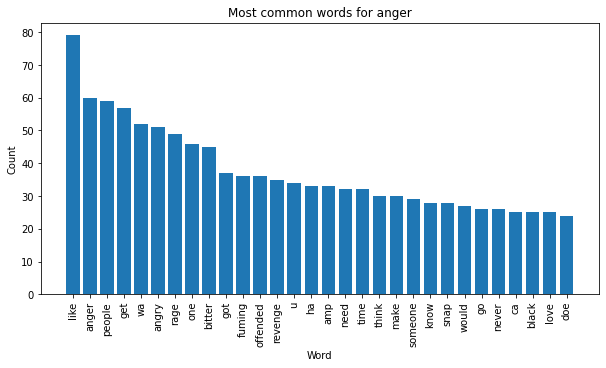

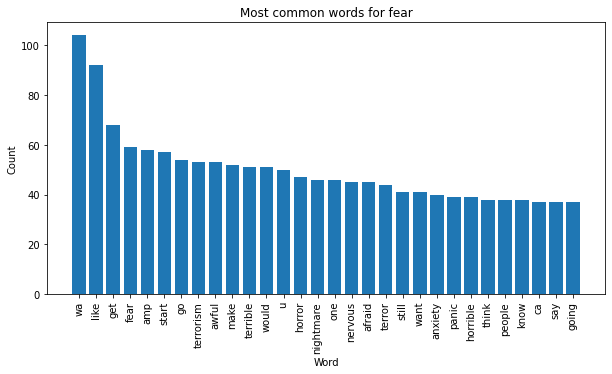

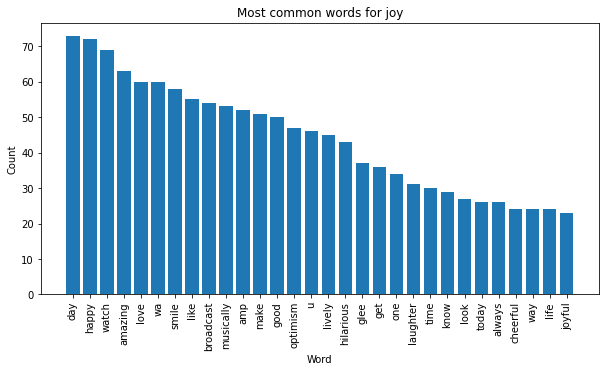

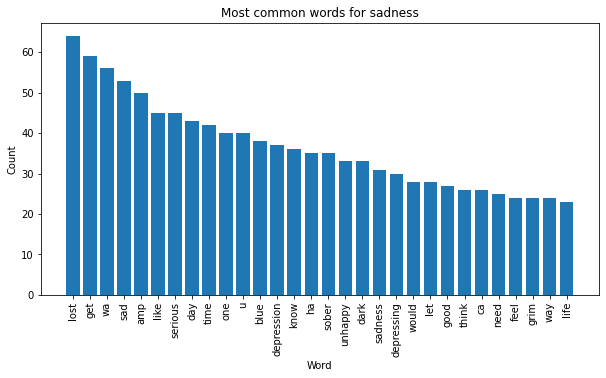

In [22]:
# Getting most common words
import matplotlib.pyplot as plt

for feeling, df in train.items():
    words_count = get_most_common_words(df=df, intensity=None)
    
    # Graph most MAX_WORDS common words, where 'y' axis are the words, 
    # and x axis is the frequency, sorted by most common
    plt.figure(figsize=(10,5))
    plt.bar(range(len(words_count)), [words_count[word] for word in words_count], align='center')
    plt.xticks(range(len(words_count)), [word for word in words_count], rotation=90)
    plt.title(f'Most common words for {feeling}')
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.show()

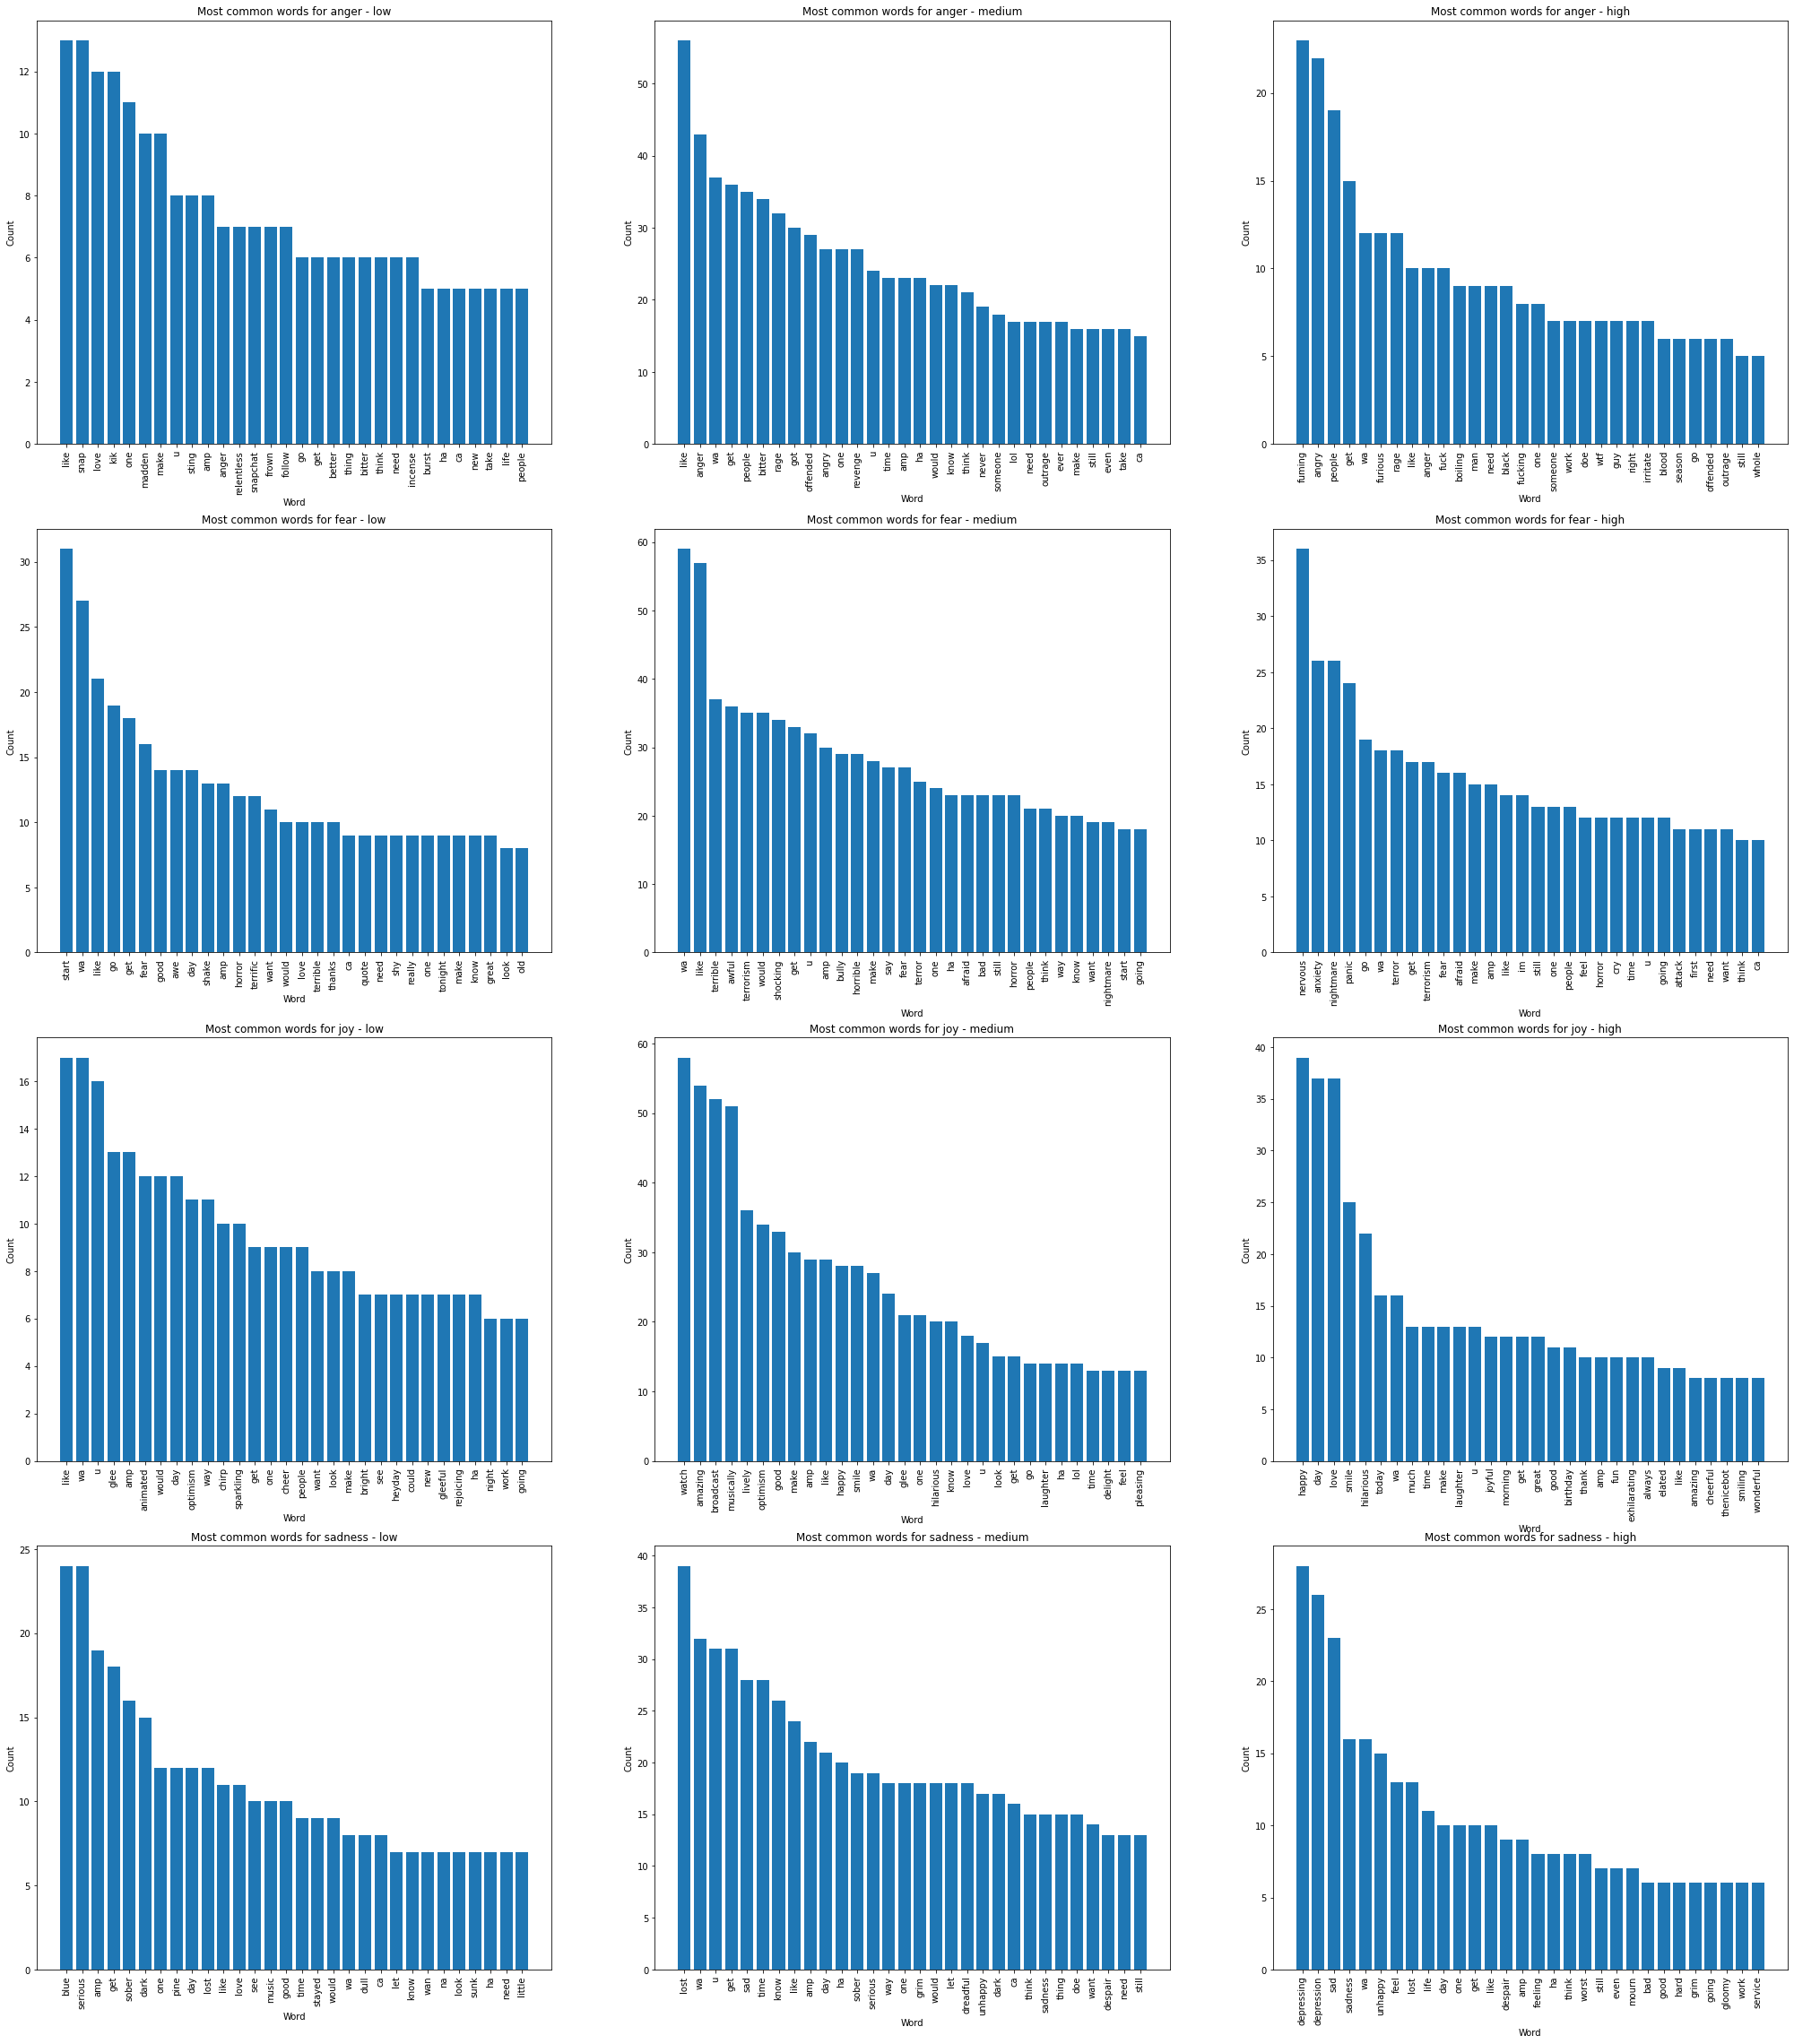

In [33]:
# Plot most common words by class, graphing each class separately in a 3 column bar chart by intensity
from typing import List
import matplotlib.pyplot as plt

intensities: List[str] = ["low", "medium", "high"]
fig, axes = plt.subplots(nrows=len(train), ncols=len(intensities), figsize=(35,40))
for i, (feeling, df) in enumerate(train.items()):
    for j, intensity in enumerate(intensities):
        words_count = get_most_common_words(df=df, intensity=intensity)
        axes[i, j].bar(range(len(words_count)), [words_count[word] for word in words_count], align='center')
        axes[i, j].set_title(f'Most common words for {feeling} - {intensity}')
        axes[i, j].set_xlabel('Word')
        axes[i, j].set_ylabel('Count')
        axes[i, j].set_xticks(range(len(words_count)))
        axes[i, j].set_xticklabels([word for word in words_count], rotation=90)
